In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider

In [8]:
def run_wave(E0=1.0, B0=0.5, phase_offset=np.pi/2):
    x = np.linspace(0, 10, 500)
    k = 2 * np.pi / 10
    ω = 2 * np.pi / 5

    fig, ax = plt.subplots()
    lineE, = ax.plot(x, E0 * np.cos(k*x), label="E‑field")
    lineB, = ax.plot(x, B0 * np.cos(k*x + phase_offset),
                     linestyle="--", label="B‑field")
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_ylabel("Amplitude")
    ax.legend()

    def update(frame):
        t = frame / 20.0
        lineE.set_ydata(E0 * np.cos(k*x - ω*t))
        lineB.set_ydata(B0 * np.cos(k*x - ω*t + phase_offset))
        return lineE, lineB

    ani = FuncAnimation(fig, update, frames=200, interval=50)
    plt.show()

In [9]:
interact(
    run_wave,
    E0=FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, description="E0"),
    B0=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5, description="B0"),
    phase_offset=FloatSlider(min=0, max=2*np.pi, step=0.1,
                             value=np.pi/2, description="Phase")
)

interactive(children=(FloatSlider(value=1.0, description='E0', max=2.0), FloatSlider(value=0.5, description='B…

<function __main__.run_wave(E0=1.0, B0=0.5, phase_offset=1.5707963267948966)>

In [10]:
Nx = 300
dx = 1.0
c  = 1.0
dt = dx / (2 * c)

Ez = np.zeros(Nx)
Hy = np.zeros(Nx)

source_position = Nx // 3

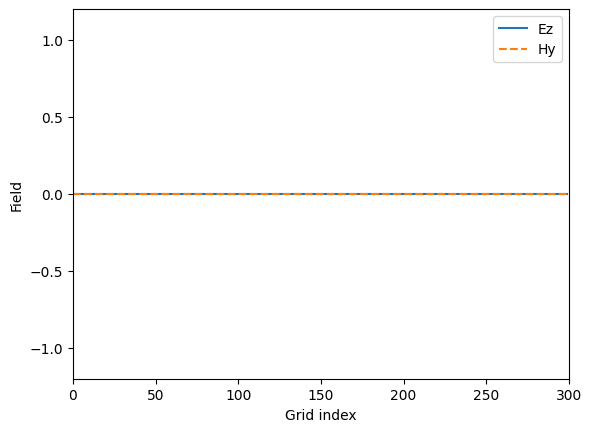

In [11]:
fig_fdtd, ax_fdtd = plt.subplots()
lineE_fdtd, = ax_fdtd.plot(Ez, label="Ez")
lineH_fdtd, = ax_fdtd.plot(Hy, label="Hy", linestyle="--")
ax_fdtd.set_ylim(-1.2, 1.2)
ax_fdtd.set_xlim(0, Nx)
ax_fdtd.set_xlabel("Grid index")
ax_fdtd.set_ylabel("Field")
ax_fdtd.legend()

In [12]:
def update_fdtd(n, Ez, Hy, source_pos, dt, dx):
    for i in range(Nx - 1):
        Hy[i] += (dt / dx) * (Ez[i+1] - Ez[i])
    for i in range(1, Nx):
        Ez[i] += (dt / dx) * (Hy[i] - Hy[i-1])
    Ez[source_pos] += np.sin(2 * np.pi * 0.02 * n)
    lineE_fdtd.set_ydata(Ez)
    lineH_fdtd.set_ydata(Hy)
    return lineE_fdtd, lineH_fdtd

ani_fdtd = FuncAnimation(
    fig_fdtd,
    update_fdtd,
    fargs=(Ez, Hy, source_position, dt, dx),
    frames=500,
    interval=20
)
plt.show()